# Ejercicio 1

# EXPLORACIÓN INICIAL DE VARIABLES Y LIMPIEZA DE DATOS

In [2]:
import pandas as pd 
import numpy as np

df = pd.read_csv(r"df_estados_bank.csv", sep=",")

df

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Surname,Exited,Tenure
0,0,1,15634602,619,Female,0.00,1,1,1,42.0,Texas,101348.88,Hargrave,1,2
1,1,2,15647311,608,Female,83807.86,1,0,1,41.0,California,112542.58,Hill,0,1
2,2,3,15619304,502,Female,159660.80,3,1,0,42.0,Texas,113931.57,Onio,1,8
3,3,4,15701354,699,Female,0.00,2,0,0,39.0,Texas,93826.63,Boni,0,1
4,4,5,15737888,850,Female,125510.82,1,1,1,43.0,California,79084.10,Mitchell,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,15606229,771,Male,0.00,2,1,0,39.0,Texas,96270.64,Obijiaku,0,5
9996,9996,9997,15569892,516,Male,57369.61,1,1,1,35.0,Texas,101699.77,Johnstone,0,10
9997,9997,9998,15584532,709,Female,0.00,1,0,1,NaN,Texas,42085.58,Liu,1,7
9998,9998,9999,15682355,772,Male,75075.31,2,1,0,42.0,Alabama,92888.52,Sabbatini,1,3


In [2]:
# columnas del dataset.

columnas = df.columns
columnas

Index(['Unnamed: 0', 'RowNumber', 'CustomerId', 'CreditScore', 'Gender',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Age',
       'Geography', 'EstimatedSalary', 'Surname', 'Exited', 'Tenure'],
      dtype='object')

In [3]:
# valores unicos en cada variable.

for i in columnas:
    print(f"{i}: ",df[i].unique())   

Unnamed: 0:  [   0    1    2 ... 9997 9998 9999]
RowNumber:  [    1     2     3 ...  9998  9999 10000]
CustomerId:  [15634602 15647311 15619304 ... 15584532 15682355 15628319]
CreditScore:  [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 74

In [4]:
# información variables.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   RowNumber        10000 non-null  int64  
 2   CustomerId       10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Gender           10000 non-null  object 
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   Age              9360 non-null   float64
 10  Geography        10000 non-null  object 
 11  EstimatedSalary  9208 non-null   float64
 12  Surname          9706 non-null   object 
 13  Exited           10000 non-null  int64  
 14  Tenure           10000 non-null  int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 1.1+ MB


## REGISTROS DUPLICADOS

In [3]:
#(antes de imputar datos).

print("Cantidad de registros duplicados: ",df.duplicated().sum())

Cantidad de registros duplicados:  0


## DATOS FALTANTES Y PORCENTAJE

In [4]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data 

,Total,%
EstimatedSalary,792,7.9
Age,640,6.4
Surname,294,2.9
Unnamed: 0,0,0.0
RowNumber,0,0.0
CustomerId,0,0.0
CreditScore,0,0.0
Gender,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


## ELIMINACIÓN DE VARIABLES

In [5]:
# Eliminamos columnas poco descriptivas (4 columnas).

df = df.drop(['Unnamed: 0','RowNumber','Surname','CustomerId'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Balance          10000 non-null  float64
 3   NumOfProducts    10000 non-null  int64  
 4   HasCrCard        10000 non-null  int64  
 5   IsActiveMember   10000 non-null  int64  
 6   Age              9360 non-null   float64
 7   Geography        10000 non-null  object 
 8   EstimatedSalary  9208 non-null   float64
 9   Exited           10000 non-null  int64  
 10  Tenure           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


## TRANSFORMACIÓN DE VARIABLES CATEGÓRICAS A NUMÉRICAS

In [6]:
Gender={'Female':0,'Male':1}
Geography = {'Texas':1,'California':2,'Alabama':3}

df['Gender'].replace(Gender, inplace=True)
df['Geography'].replace(Geography, inplace=True)

print("Valores variable Gender: ",df['Gender'].unique())
print("Valores variable Geography: ",df['Geography'].unique())

Valores variable Gender:  [0 1]
Valores variable Geography:  [1 2 3]


In [82]:
df.dtypes

CreditScore          int64
Gender               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
Age                float64
Geography            int64
EstimatedSalary    float64
Exited               int64
Tenure               int64
dtype: object

## IMPUTAMOS DATO DE LA MEDIANA A LOS FALTANTES 

In [7]:
# se imputan a los datos faltantes de las variables EstimatedSalary y Age.

df = df.apply(lambda x:x.fillna(x.median()))
df.isnull().sum()

CreditScore        0
Gender             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Age                0
Geography          0
EstimatedSalary    0
Exited             0
Tenure             0
dtype: int64

In [85]:
# registros DUPLICADOS (después de imputar datos).

print("Cantidad de registros duplicados: ",df.duplicated().sum())

Cantidad de registros duplicados:  0


In [86]:
df.describe()

,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,76485.889288,1.530200,0.70550,0.515100,38.754200,1.749500,100319.631136,0.170300,7.217800
std,96.653299,0.497932,62397.405202,0.581654,0.45584,0.499797,10.149378,0.830433,55246.134379,0.375915,14.965552
min,350.000000,0.000000,0.000000,1.000000,0.00000,0.000000,18.000000,1.000000,11.580000,0.000000,0.000000
25%,584.000000,0.000000,0.000000,1.000000,0.00000,0.000000,32.000000,1.000000,55360.935000,0.000000,3.000000
50%,652.000000,1.000000,97198.540000,1.000000,1.00000,1.000000,37.000000,1.000000,100608.435000,0.000000,5.000000
75%,718.000000,1.000000,127644.240000,2.000000,1.00000,1.000000,43.000000,3.000000,145426.527500,0.000000,7.000000
max,850.000000,1.000000,250898.090000,4.000000,1.00000,1.000000,92.000000,3.000000,199992.480000,1.000000,100.000000


## OUTLIERS

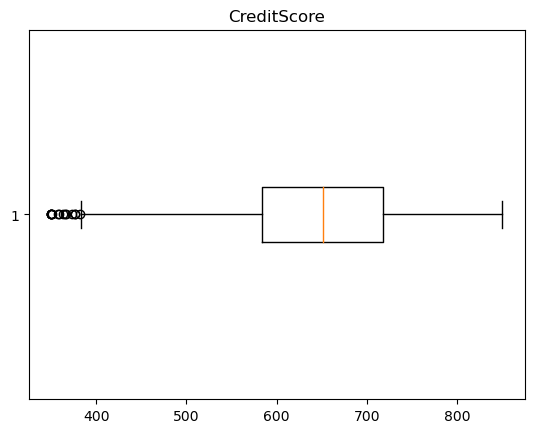

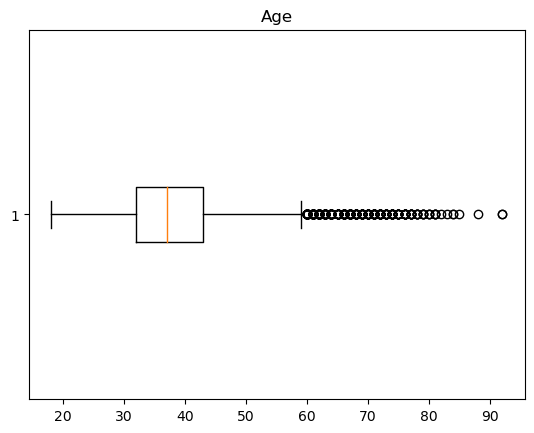

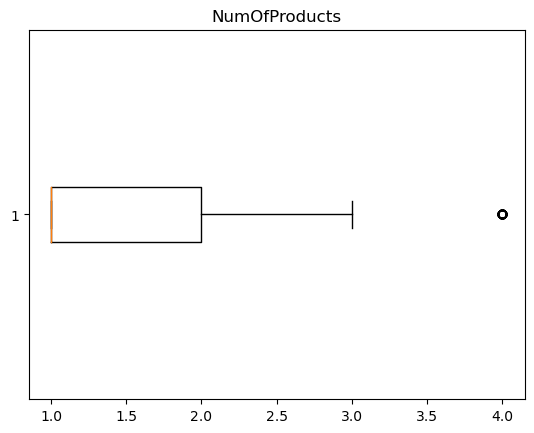

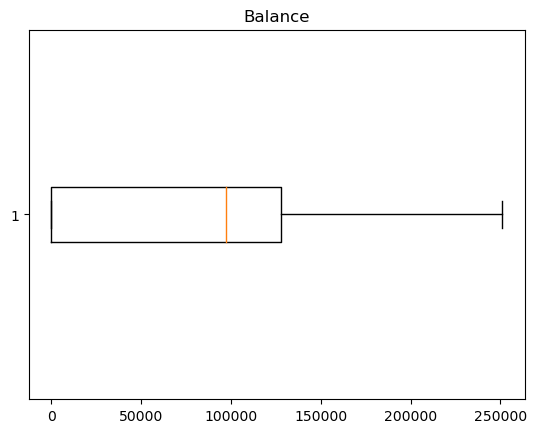

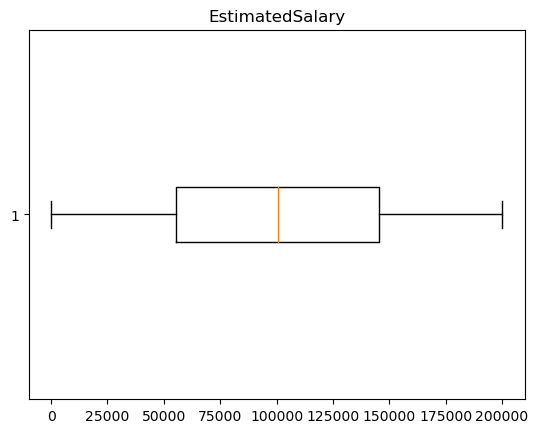

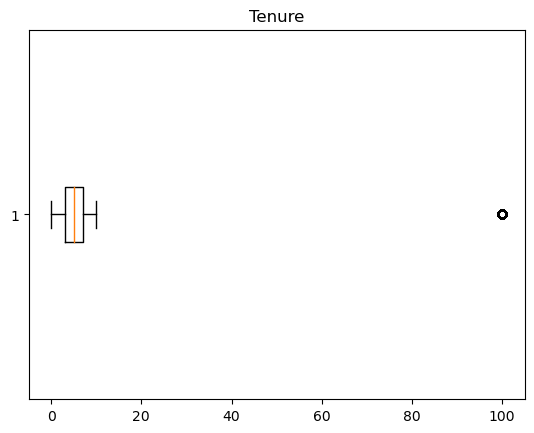

In [8]:
# Estudio con graficos de caja variables 'CreditScore','Age','NumOfProducts','Balance','EstimatedSalary' y'Tenure'

import matplotlib.pyplot as plt


variables = ['CreditScore','Age','NumOfProducts','Balance','EstimatedSalary','Tenure']


def show_grafico_caja(df, nombre_columna):
    datos = df[[nombre_columna]]
    plt.boxplot(datos, vert=False)
    plt.title(nombre_columna)
    plt.show()
    
    
for col in variables:
    show_grafico_caja(df,col)
    
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: unset !important; }</style>"))
  

In [88]:
# El llamado credit score (puntuación de crédito) es un indicador que va desde el número 300 hasta el 850 y que se 
# usa para estimar tu nivel de solvencia financiera.

print(df['CreditScore'].max())
print(df['CreditScore'].min())


850
350


**Imputamos percentil 97 a los outliers de las variables 'Age' y 'Tenure'.** 

**Consideramos que los outliers en CreditScore y NumOfProducts estan dentro de los rangos dados para estos indicadores.**

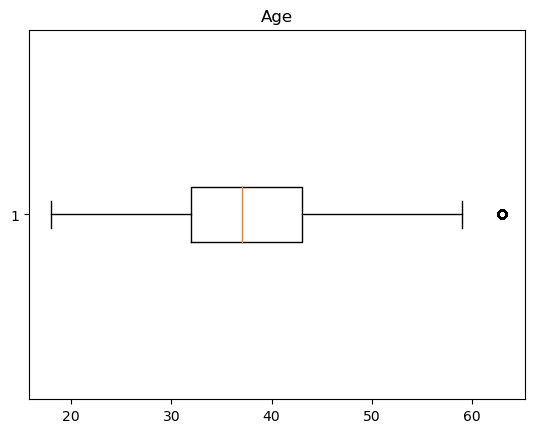

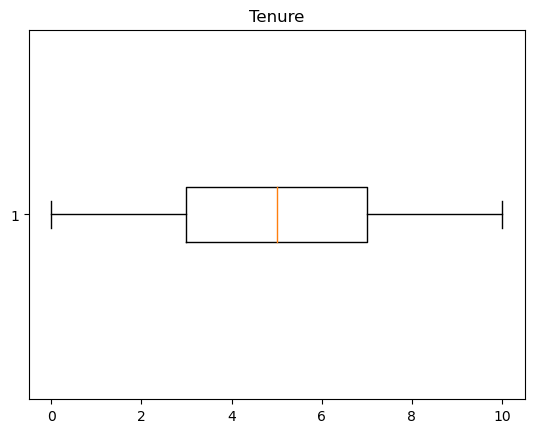

In [9]:
import matplotlib.pyplot as plt

def procesar_columna(df, nombre_columna):
    Q3 = np.percentile(df[nombre_columna], 75)
    Q1 = np.percentile(df[nombre_columna], 25)
    RI = Q3 - Q1

    limite_superior = Q3 + 1.5 * RI
    limite_inferior = Q1 - 1.5 * RI

    df[nombre_columna] = np.where(df[nombre_columna] > limite_superior, 
                                  np.percentile(df[nombre_columna], 97),
                                  df[nombre_columna])

    df[nombre_columna] = np.where(df[nombre_columna] < limite_inferior, 
                                  np.percentile(df[nombre_columna], 5),
                                  df[nombre_columna])
    return df[nombre_columna]


variables_outlier = ['Age','Tenure']


for col in variables_outlier:
    df[col] = procesar_columna(df, col)


# función para mostrar gráficos de caja
def show_grafico_caja(df, nombre_columna):
    datos = df[[nombre_columna]]
    plt.boxplot(datos, vert=False)
    plt.title(nombre_columna)
    plt.show()
    
    
for col in variables_outlier:
    show_grafico_caja(df, col)

## ESTUDIO VARIABLES CON GRÁFICOS

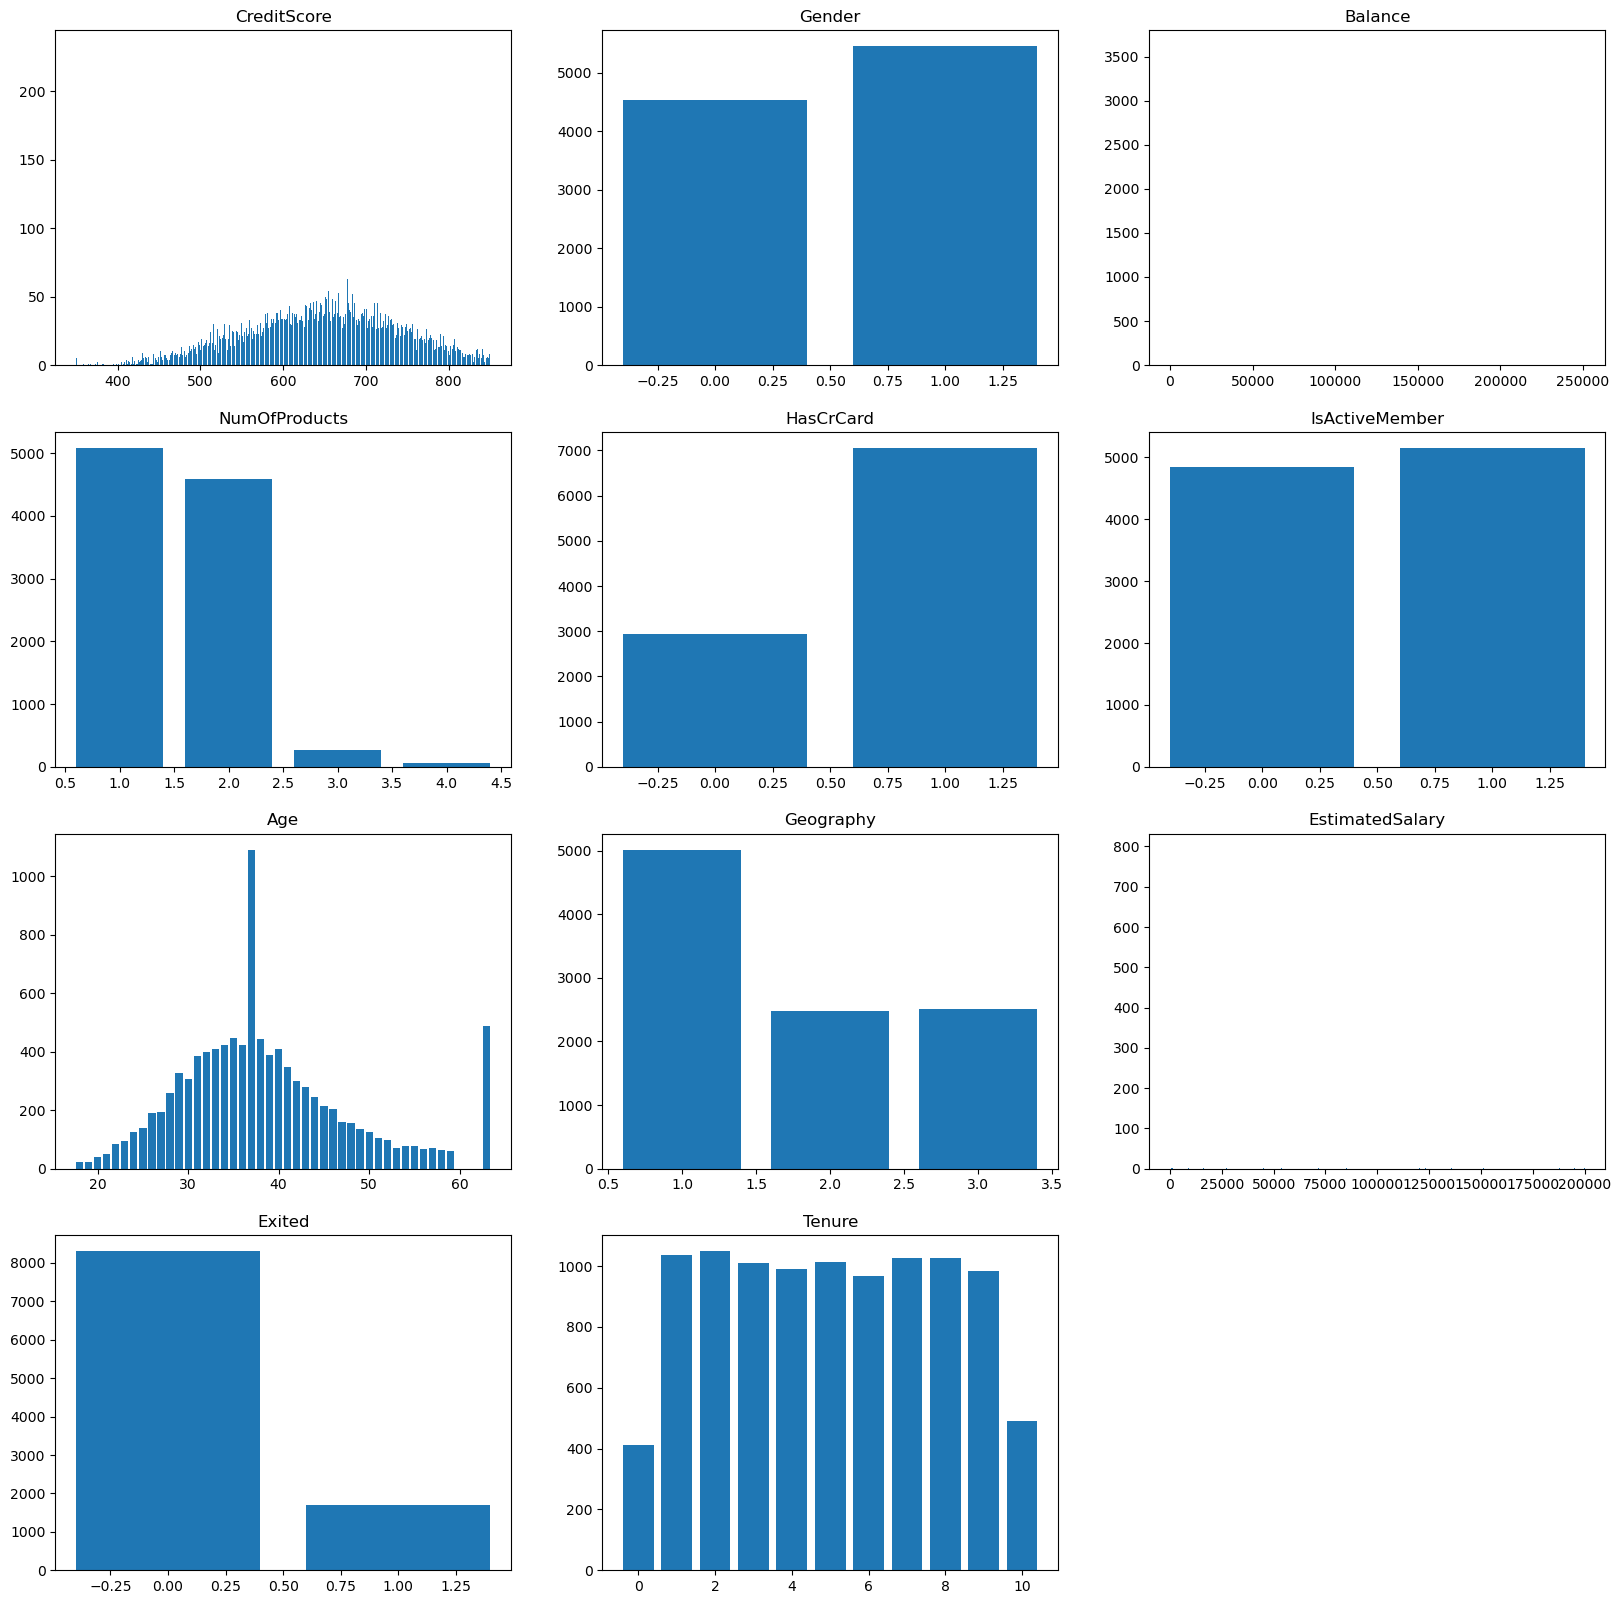

In [10]:

fig = plt.figure(figsize=(20,20))

for i,column in enumerate(df.columns):
    ax = fig.add_subplot(4,3,i+1)
    ax.bar(df[column].value_counts().index, df[column].value_counts())
    ax.set_title(column)
    
plt.show()

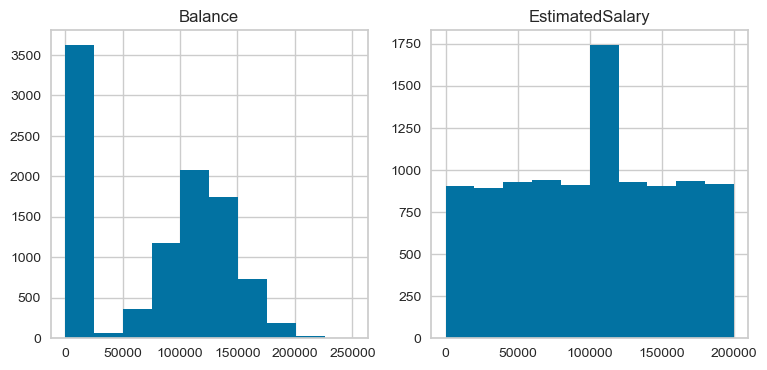

In [142]:
fig = plt.figure(figsize=(9,4))

for i, var in enumerate(['Balance', 'EstimatedSalary']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(df[var], bins=10)
    ax.set_title(var)

plt.show()



In [126]:
df.describe()


,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,76485.889288,1.530200,0.70550,0.515100,38.5770,1.749500,100319.631136,0.170300,5.012800
std,96.653299,0.497932,62397.405202,0.581654,0.45584,0.499797,9.5942,0.830433,55246.134379,0.375915,2.892174
min,350.000000,0.000000,0.000000,1.000000,0.00000,0.000000,18.0000,1.000000,11.580000,0.000000,0.000000
25%,584.000000,0.000000,0.000000,1.000000,0.00000,0.000000,32.0000,1.000000,55360.935000,0.000000,3.000000
50%,652.000000,1.000000,97198.540000,1.000000,1.00000,1.000000,37.0000,1.000000,100608.435000,0.000000,5.000000
75%,718.000000,1.000000,127644.240000,2.000000,1.00000,1.000000,43.0000,3.000000,145426.527500,0.000000,7.000000
max,850.000000,1.000000,250898.090000,4.000000,1.00000,1.000000,63.0000,3.000000,199992.480000,1.000000,10.000000


In [6]:
# Cantidad registros variables categoricas

variables3 = ["Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Geography","Exited"]

for i in variables3:
    print(" ")
    print(df[i].value_counts())

 
1    5457
0    4543
Name: Gender, dtype: int64
 
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
 
1    7055
0    2945
Name: HasCrCard, dtype: int64
 
1    5151
0    4849
Name: IsActiveMember, dtype: int64
 
1    5014
3    2509
2    2477
Name: Geography, dtype: int64
 
0    8297
1    1703
Name: Exited, dtype: int64


In [5]:
# ¿es normal que un porcentaje tan alto de los clientes tengan el dato de la variable 'Balance' igual a cero?

porcentaje_ceros = (df['Balance'] == 0).mean() * 100
print(f"Porcentaje de valores ceros en la variable 'Balance': {porcentaje_ceros}%")

Porcentaje de valores ceros en la variable 'Balance': 36.17%


In [143]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

## BALANCEO DEL TARGET

In [11]:
print(df['Exited'].value_counts())

balanceo = df["Exited"].mean()*100

print(balanceo)

0    8297
1    1703
Name: Exited, dtype: int64
17.03


**En un principio consideramos que es un balance aceptable, pero después en la fase de modelización comprobaremos que es necesario modificar el punto de corte en el modelo, pues no se identifican bien los 1.**

## PROCESO DE SELECCIÓN DE VARIABLES PARA EL MODELO

In [11]:
df_limpio = df.copy()

df_limpio

,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure
0,619,0,0.00,1,1,1,42.0,1,101348.88,1,2.0
1,608,0,83807.86,1,0,1,41.0,2,112542.58,0,1.0
2,502,0,159660.80,3,1,0,42.0,1,113931.57,1,8.0
3,699,0,0.00,2,0,0,39.0,1,93826.63,0,1.0
4,850,0,125510.82,1,1,1,43.0,2,79084.10,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,0.00,2,1,0,39.0,1,96270.64,0,5.0
9996,516,1,57369.61,1,1,1,35.0,1,101699.77,0,10.0
9997,709,0,0.00,1,0,1,37.0,1,42085.58,1,7.0
9998,772,1,75075.31,2,1,0,42.0,3,92888.52,1,3.0


## Coeficiente Correlación Pearson

In [7]:
# dataframe solo con variables predictivas

df_limpio_data = df_limpio.drop('Exited',axis=1)


df_limpio_data.corr()

,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Tenure
CreditScore,1.000000,-0.002857,0.006268,0.012238,-0.005458,0.025651,-0.006368,0.008267,-0.000405,0.000842
Gender,-0.002857,1.000000,0.012087,-0.021859,0.005766,0.022544,-0.025973,-0.016936,-0.003546,0.014733
Balance,0.006268,0.012087,1.000000,-0.304180,-0.014858,-0.010084,0.028388,0.348700,0.014554,-0.012254
NumOfProducts,0.012238,-0.021859,-0.304180,1.000000,0.003183,0.009612,-0.031152,-0.006180,0.014842,0.013444
HasCrCard,-0.005458,0.005766,-0.014858,0.003183,1.000000,-0.011866,-0.011999,0.004036,-0.007448,0.022583
IsActiveMember,0.025651,0.022544,-0.010084,0.009612,-0.011866,1.000000,0.068740,-0.012692,-0.009386,-0.028362
Age,-0.006368,-0.025973,0.028388,-0.031152,-0.011999,0.068740,1.000000,0.045884,-0.006967,-0.012041
Geography,0.008267,-0.016936,0.348700,-0.006180,0.004036,-0.012692,0.045884,1.000000,0.007952,0.001418
EstimatedSalary,-0.000405,-0.003546,0.014554,0.014842,-0.007448,-0.009386,-0.006967,0.007952,1.000000,0.010971
Tenure,0.000842,0.014733,-0.012254,0.013444,0.022583,-0.028362,-0.012041,0.001418,0.010971,1.000000


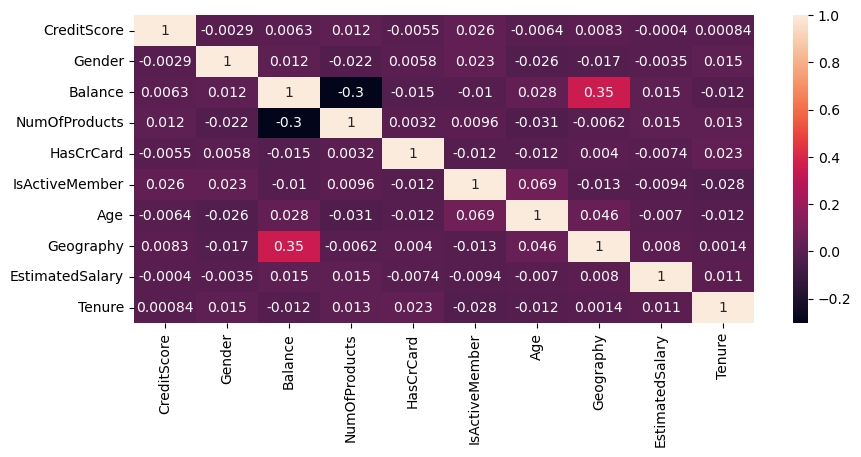

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,4))
sns.heatmap(df_limpio_data.corr(),annot=True)
plt.show()

De aquí no es posible visualizar ninguna colinealidad entre variables. No descartaríamos ninguna a priori.

## VIF

In [96]:

# Dividimos entre conjunto de variables predictoras y conjunto de variables objetivo:
target_labels = ['Exited']
pred_labels = df_limpio.columns.to_list()
pred_labels = [label for label in pred_labels if label not in target_labels]

# Comprobamos que las dimensiones cuadran con lo que debería ser. Es decir, el total de variables predictoras debe ser 10
print(len(pred_labels))

# Construimos el conjunto de datos predictor y el conjunto objetivo:
x_pred = df_limpio[pred_labels]
y_target = df_limpio[target_labels]

10


In [97]:
# función para el cálculo del VIF de todas las variables contenidas en el conjunto de datos predictor (numericas):

# Debo importar LinearRegression para el cálculo de las Ri
from sklearn.linear_model import LinearRegression

def calculateVIF(var_predictoras_df):
    var_pred_labels = list(var_predictoras_df.columns)
    num_var_pred = len(var_pred_labels)
    
    lr_model = LinearRegression()
    
    result = pd.DataFrame(index=['VIF'], columns=var_pred_labels)
    result = result.fillna(0)
    
    for ite in range(num_var_pred):
        x_features = var_pred_labels[:]
        y_feature = var_pred_labels[ite]
        x_features.remove(y_feature)
        
        x = var_predictoras_df[x_features]
        y = var_predictoras_df[y_feature]
        
        lr_model.fit(x, y)
        
        result.loc['VIF', y_feature] = 1 / (1 - lr_model.score(x, y))
    
    return result

vif_result = calculateVIF(x_pred.copy(deep=True)).T
print(vif_result)

                      VIF
CreditScore      1.001065
Gender           1.002975
Balance          1.271603
NumOfProducts    1.118045
HasCrCard        1.001207
IsActiveMember   1.006389
Age              1.008480
Geography        1.155919
EstimatedSalary  1.000941
Tenure           1.002422


La colinealidad de las variables con la variable objetivo es baja, ninguna supera del ratio 5.

## Chi2

In [98]:
# Variables cualitativas

import scipy.stats as stats
import numpy as np

variables = ["Gender","NumOfProducts","HasCrCard",'IsActiveMember','Geography']

for i in variables:
    CrosstabResult = pd.crosstab(index=df[i],columns=df_limpio['Exited'])
    Crosstabpercent = pd.crosstab(index=df[i],columns = df_limpio['Exited'],normalize="index")
    print(Crosstabpercent)
    ChiSqResult = stats.chi2_contingency(CrosstabResult)
    chi2_stat, pvalue, dof, frecuencias = ChiSqResult
    prob = 0.95
    critical = stats.chi2.ppf(prob, df = dof)

    if np.abs(chi2_stat) < critical:
        print("Variable dependiente con la target, se rechaza")
        print("El P-Valor del Test Chi2 es:", ChiSqResult[1])

Exited         0         1
Gender                    
0       0.788906  0.211094
1       0.863661  0.136339
Exited                0         1
NumOfProducts                    
1              0.764949  0.235051
2              0.939651  0.060349
3              0.330827  0.669173
4              0.116667  0.883333
Exited            0         1
HasCrCard                    
0          0.827165  0.172835
1          0.830758  0.169242
Variable dependiente con la target, se rechaza
El P-Valor del Test Chi2 es: 0.6843098852991205
Exited                 0         1
IsActiveMember                    
0               0.776243  0.223757
1               0.880023  0.119977
Exited            0         1
Geography                    
1          0.838452  0.161548
2          0.968107  0.031893
3          0.675568  0.324432


**Has Credit Card** es la única variable que este método arroja como dependiente del target

## Chi - squared test

In [100]:
# Este test contrasta cada variable con la variable objetivo y destaca aquellas variables que son 
# relevantes para la clasificación. Solo admite valores positivos. 

# usamos estos dos dataframes creados más arriba
#x_pred = df[pred_labels]
#y_target = df[target_labels]

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector_var = SelectKBest(score_func=chi2, k=4)

selector_var.fit_transform(X = x_pred, y = y_target['Exited'])

print(selector_var.get_feature_names_out())

['CreditScore' 'Balance' 'Age' 'EstimatedSalary']


Destaca como variables más relevantes a **'CreditScore' 'Balance' 'IsActiveMember' 'Age' 'EstimatedSalary'**
para identificar la variable objetivo Exited

## Feature importance

In [101]:
# ExtraTreesClassifier estadisticos asociados a la importancia que tiene cada variable con el target, 
# seleccionamos los que tienen el valor más alto

from sklearn.ensemble import ExtraTreesClassifier

X = df_limpio_data
y = df_limpio['Exited']

df_comparar = df_limpio
model = ExtraTreesClassifier()
model.fit(X,y)

for i,e in zip(X.columns,model.feature_importances_):
    print(f"{i}: {e}")

CreditScore: 0.13235947939272832
Gender: 0.017580035023192615
Balance: 0.12999338575798464
NumOfProducts: 0.12385895542048976
HasCrCard: 0.023295121131133963
IsActiveMember: 0.03645884097441787
Age: 0.21080024944667217
Geography: 0.09049410111267207
EstimatedSalary: 0.13169096536541514
Tenure: 0.10346886637529346


Según esta métrica las variables a incluir son:

**Age, Credit Score, Estimated Salary, Balance, Number of Products** --> en ese órden

## Varianza

In [102]:
# identificar y seleccionar características que tienen una varianza por encima del umbral especificado.

from sklearn.feature_selection import VarianceThreshold

var_th = VarianceThreshold(threshold = 0.5) #Aquí se indica la varianza mínima requerida
x_var = var_th.fit_transform(df_limpio_data)

print("Número de características generales", df_limpio_data.shape[1])
print("Número de características finales", x_var.shape[1])
print("Listado de características originales",df_limpio_data.columns)
print("Listado de características finales",df_limpio_data.columns[var_th.get_support()])

Número de características generales 10
Número de características finales 6
Listado de características originales Index(['CreditScore', 'Gender', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Age', 'Geography', 'EstimatedSalary', 'Tenure'],
      dtype='object')
Listado de características finales Index(['CreditScore', 'Balance', 'Age', 'Geography', 'EstimatedSalary',
       'Tenure'],
      dtype='object')


In [103]:
for i in df_limpio_data.columns:
    if i not in df_limpio_data.columns[var_th.get_support()]:
        print(f"Variable con baja varianza eliminada:{i}")

Variable con baja varianza eliminada:Gender
Variable con baja varianza eliminada:NumOfProducts
Variable con baja varianza eliminada:HasCrCard
Variable con baja varianza eliminada:IsActiveMember


Esta técnica arroja las siguientes variables:

**'CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure'**

## Modelo de regularización de Lasso

In [104]:
#Importamos las librerías necesarias
from sklearn.linear_model import Lasso

X = df_limpio_data
y = df_limpio['Exited']

#Generamos un objeto Lasso
reg = Lasso(alpha = 0.5)

#Entrenamos el modelo con los datos
reg.fit(X, y)

#Calculamos la puntuación del modelo
score = reg.score(X, y)

#Mostramos los resultados
print("Coeficientes: \n", reg.coef_)
print("Término independiente:", reg.intercept_)
print("Puntuación del modelo:", score)


Coeficientes: 
 [-5.31344945e-05 -0.00000000e+00  7.69013203e-07 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  5.35003073e-03  0.00000000e+00
  2.33892547e-08 -0.00000000e+00]
Término independiente: -0.06164335074570412
Puntuación del modelo: 0.07261434813876622


In [105]:
# Obtener los nombres de las variables
nombres_variables = X.columns

# Obtener los coeficientes del modelo
coeficientes = reg.coef_


coeficientes_variables = zip(nombres_variables, coeficientes)

for variable, coeficiente in coeficientes_variables:
    print("Variable:", variable, "Coeficiente:", coeficiente)


Variable: CreditScore Coeficiente: -5.313449452111668e-05
Variable: Gender Coeficiente: -0.0
Variable: Balance Coeficiente: 7.690132025032593e-07
Variable: NumOfProducts Coeficiente: -0.0
Variable: HasCrCard Coeficiente: -0.0
Variable: IsActiveMember Coeficiente: -0.0
Variable: Age Coeficiente: 0.0053500307340885785
Variable: Geography Coeficiente: 0.0
Variable: EstimatedSalary Coeficiente: 2.3389254737551692e-08
Variable: Tenure Coeficiente: -0.0


Esta métrica nos indica que deberíamos quedarnos con:

**Estimated Salary, Balance, Age, Credit Score**

## Árbol de clasificación

In [15]:
# Selección de variables con árbol de clasificación

from sklearn.tree import DecisionTreeClassifier

X = df_limpio_data
y = df_limpio['Exited']

# Entrenar el modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier()
modelo_arbol.fit(X, y)

importancia_variables = modelo_arbol.feature_importances_

df_importancia = pd.DataFrame({'Variable': X.columns, 'Puntuacion': importancia_variables})
df_importancia = df_importancia.sort_values('Puntuacion', ascending=False)


df_importancia

,Variable,Puntuacion
6,Age,0.177359
8,EstimatedSalary,0.159335
2,Balance,0.154374
0,CreditScore,0.151771
3,NumOfProducts,0.102442
7,Geography,0.094462
9,Tenure,0.077889
5,IsActiveMember,0.051527
1,Gender,0.018281
4,HasCrCard,0.012561


Este método nos indica que deberíamos quedarnos con:

**Estimated Salary, Balance, Age, Credit Score**

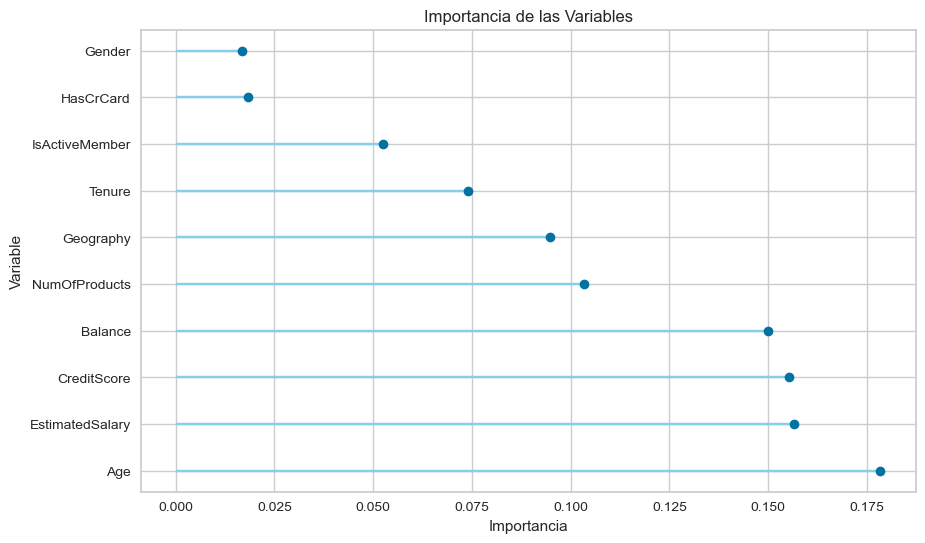

In [148]:
# Graficación de variables por importancia para predicción variable objetivo:

import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

my_range = range(len(df_importancia))

# Graficar las barras horizontales afinadas en formato de línea
plt.hlines(y = my_range, xmin=0, xmax=df_importancia['Puntuacion'], color='skyblue')

# Graficar los puntos en los extremos de las líneas
plt.plot(df_importancia['Puntuacion'], my_range, "o")

# Configurar las etiquetas del eje y
plt.yticks(my_range, df_importancia['Variable'])

# Configurar el título y las etiquetas de los ejes
plt.title("Importancia de las Variables")
plt.xlabel("Importancia")
plt.ylabel("Variable")

# Mostrar el gráfico
plt.show()



### ANÁLISIS CARACTERÍSTICAS  REGISTROS VALOR EXITED = 1

In [52]:
df_exited = df_limpio[df_limpio['Exited'] == 1]

In [34]:
df_exited[['Age','CreditScore','Balance','EstimatedSalary']].describe()

,Age,CreditScore,Balance,EstimatedSalary
count,1703.000000,1703.000000,1703.000000,1703.000000
mean,44.277745,644.643570,94604.126841,100864.576506
std,9.487627,100.974135,55900.139934,55905.957270
min,18.000000,350.000000,0.000000,11.580000
25%,37.000000,576.000000,69404.020000,55457.450000
50%,44.000000,645.000000,111578.180000,100608.435000
75%,51.000000,716.500000,131862.940000,147400.615000
max,63.000000,850.000000,238387.560000,199725.390000


### ANÁLISIS CARACTERÍSTICAS REGISTROS VALOR EXITED = 0

In [33]:
df_stay= df_limpio[df_limpio['Exited'] == 0]

df_stay[['Age','CreditScore','Balance','EstimatedSalary']].describe()

,Age,CreditScore,Balance,EstimatedSalary
count,8297.000000,8297.000000,8297.000000,8297.000000
mean,37.406894,651.736772,72767.032044,100207.778422
std,9.188928,95.703857,63010.904758,55112.460324
min,18.000000,363.000000,0.000000,90.070000
25%,31.000000,585.000000,0.000000,55362.450000
50%,37.000000,653.000000,91562.990000,100608.435000
75%,41.000000,718.000000,126442.590000,145111.370000
max,63.000000,850.000000,250898.090000,199992.480000


# MODELO REGRESIÓN LOGÍSTICA 

In [8]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

pred_labels = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

X = df_limpio_data[pred_labels]
y = df_limpio['Exited']

# Subdividimos el dataset
kfold = KFold(n_splits=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Entrenamos y testeamos
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)
predicted = model_logistic.predict(X_test)


# Hacemos las predicciones con los datos en test
result_logistic_score = cross_val_score(model_logistic, X, y, cv=kfold)
result_logisstic_accuracy = cross_val_score(model_logistic, X, y, cv=kfold, scoring="accuracy") 
result_logisstic_precision = cross_val_score(model_logistic, X, y, cv=kfold, scoring="precision")
result_logisstic_recall = cross_val_score(model_logistic, X, y, cv=kfold, scoring="recall")
result_logisstic_f1 = cross_val_score(model_logistic, X, y, cv=kfold, scoring="f1")
result_logisstic_matrix = confusion_matrix(y_test, predicted)
result_logisstic_roc_auc = cross_val_score(model_logistic, X, y, cv=kfold, scoring="roc_auc")


print("SCORE: ", result_logistic_score.mean())
print("ACCURACY: ", result_logisstic_accuracy.mean())
print("PRECISIÓN: ", result_logisstic_precision.mean())
print("RECALL: ", result_logisstic_recall.mean())
print("F1:", result_logisstic_f1.mean())
print("MATRIX:")
print(result_logisstic_matrix)
print("ROC AUC: ", result_logisstic_roc_auc.mean())


SCORE:  0.8276008464673702
ACCURACY:  0.8276008464673702
PRECISIÓN:  0.270227631282398
RECALL:  0.025613385465515212
F1: 0.046751923957061736
MATRIX:
[[2719   32]
 [ 519   30]]
ROC AUC:  0.6410998049248124


# MODELO ÁRBOLES DE DECISIÓN

In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score

#Creamos una instancia del árbol de decisión
model_tree = tree.DecisionTreeClassifier(max_depth = 4, criterion = 'gini', random_state = 42)

#Entrenamos el árbol de decisión con los datos de entrenamiento 
model_tree.fit(X_train,y_train)
predicted_tree = model_tree.predict(X_test)

#Mostramos la puntuación del modelo
print("Puntuación:", model_tree.score(X_test,y_test))

# Hacemos las predicciones con los datos en test
result_tree_accuracy = cross_val_score(model_tree, X, y, cv=kfold, scoring="accuracy") 
result_tree_precision = cross_val_score(model_tree, X, y, cv=kfold, scoring="precision")
result_tree_recall = cross_val_score(model_tree, X, y, cv=kfold, scoring="recall")
result_tree_f1 = cross_val_score(model_tree, X, y, cv=kfold, scoring="f1")
result_tree_matrix = confusion_matrix(y_test, predicted_tree)
result_tree_roc_auc = cross_val_score(model_tree, X, y, cv=kfold, scoring="roc_auc")


print("ACCURACY: ", result_tree_accuracy.mean())
print("PRECISIÓN: ", result_tree_precision.mean())
print("RECALL: ", result_tree_recall.mean())
print("F1:", result_tree_f1.mean())
print("MATRIX:")
print(result_tree_matrix)
print("ROC AUC: ", result_tree_roc_auc.mean())


Puntuación: 0.8303030303030303
ACCURACY:  0.8281009864633734
PRECISIÓN:  0.45171957671957674
RECALL:  0.09305996535796125
F1: 0.13998512473467592
MATRIX:
[[2630  121]
 [ 439  110]]
ROC AUC:  0.7348372388028709


### Gráfico del árbol de decisión

Profundidad del árbol: 4
Número de nodos terminales: 16


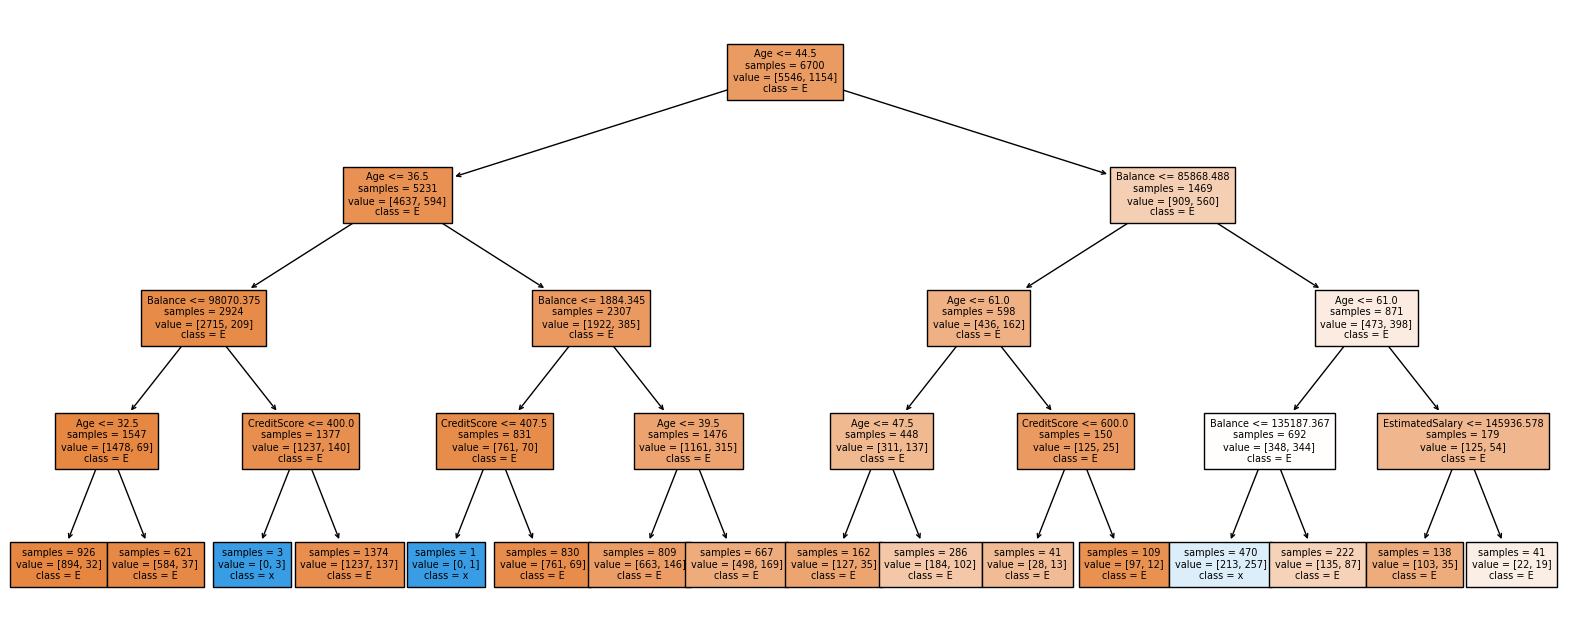

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 8))

print(f"Profundidad del árbol: {model_tree.get_depth()}")
print(f"Número de nodos terminales: {model_tree.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model_tree,
            feature_names = X.columns.tolist(),
            class_names   = 'Exited',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

## MODELO DESBALANCEADO.  AJUSTE PUNTO DE CORTE

In [31]:

modelo_ajusta_train = tree.DecisionTreeClassifier(max_depth = 4, criterion = 'gini').fit(X_train, y_train)

prediccion_xtest = modelo_ajusta_train.predict(X_test)  
print("punto de corte 0.5", prediccion_xtest)  
                                               
print(prediccion_xtest.sum())  #sumatorio de los 1 que estoy teniendo (231) con un punto de corte de 0.5


punto de corte 0.5 [0 0 0 ... 0 0 1]
231


In [32]:
# Calculo de la PRECISIÓN del modelo de árbol antes del ajuste 

from sklearn.metrics import precision_score

precision_score(y_test, prediccion_xtest, average='binary')
# precision de 47%

0.47619047619047616

In [74]:
# Calculo la SENSIBILIDAD del modelo de árbol antes del ajuste 

from sklearn.metrics import recall_score

recall_score(y_test, prediccion_xtest, average='binary')

# sensibilidad de 0.20, indica que la mayor parte de las veces identifico los unos como ceros

0.20036429872495445

In [37]:
# CAMBIO EL PUNTO DE CORTE: varias pruebas desde 0.5 hasta 0.025

predictions_04 = np.where(modelo_ajusta_train.predict_proba(X_test) >= 0.4, 1, 0)
predi_04 = predictions_04[:,1]  

predictions_03 = np.where(modelo_ajusta_train.predict_proba(X_test) >= 0.3, 1, 0)
predi_03 = predictions_03[:,1]

predictions_02 = np.where(modelo_ajusta_train.predict_proba(X_test) >= 0.2, 1, 0)
predi_02 = predictions_02[:,1]

predictions_01 = np.where(modelo_ajusta_train.predict_proba(X_test) >= 0.1, 1, 0)
predi_01 = predictions_01[:,1]

predictions_008 = np.where(modelo_ajusta_train.predict_proba(X_test) >= 0.08, 1, 0)
predi_008 = predictions_008[:,1]

predictions_005 = np.where(modelo_ajusta_train.predict_proba(X_test) >= 0.05, 1, 0)
predi_005 = predictions_005[:,1]

predictions_0025 = np.where(modelo_ajusta_train.predict_proba(X_test) >= 0.025, 1, 0)
predi_0025 = predictions_0025[:,1]


In [38]:
print('Sumatorio de target=1 con punto de corte =0.5:', prediccion_xtest.sum())
print('Sumatorio de target=1 con punto de corte =0.4:', predi_04.sum())
print('Sumatorio de target=1 con punto de corte =0.3:', predi_03.sum())
print('Sumatorio de target=1 con punto de corte =0.2:', predi_02.sum())
print('Sumatorio de target=1 con punto de corte =0.1:', predi_01.sum())
print('Sumatorio de target=1 con punto de corte =0.08:', predi_008.sum()) 
print('Sumatorio de target=1 con punto de corte =0.05:', predi_005.sum())    
print('Sumatorio de target=1 con punto de corte =0.025:', predi_0025.sum())  
print(' ')

print("Sensibilidad con punto de corte 0.5:",recall_score(y_test, prediccion_xtest, average='binary'))
print("Sensibilidad con punto de corte 0.4:",recall_score(y_test, predi_04, average='binary'))   
print("Sensibilidad con punto de corte 0.3:",recall_score(y_test, predi_03, average='binary'))    
print("Sensibilidad con punto de corte 0.2:",recall_score(y_test, predi_02, average='binary'))
print("Sensibilidad con punto de corte 0.1:",recall_score(y_test, predi_01, average='binary'))
print("Sensibilidad con punto de corte 0.08:",recall_score(y_test, predi_008, average='binary'))
print("Sensibilidad con punto de corte 0.05:",recall_score(y_test, predi_005, average='binary'))
print("Sensibilidad con punto de corte 0.025:",recall_score(y_test, predi_0025, average='binary'))    


Sumatorio de target=1 con punto de corte =0.5: 231
Sumatorio de target=1 con punto de corte =0.4: 253
Sumatorio de target=1 con punto de corte =0.3: 499
Sumatorio de target=1 con punto de corte =0.2: 1008
Sumatorio de target=1 con punto de corte =0.1: 1466
Sumatorio de target=1 con punto de corte =0.08: 2593
Sumatorio de target=1 con punto de corte =0.05: 2858
Sumatorio de target=1 con punto de corte =0.025: 3300
 
Sensibilidad con punto de corte 0.5: 0.20036429872495445
Sensibilidad con punto de corte 0.4: 0.20947176684881602
Sensibilidad con punto de corte 0.3: 0.38979963570127507
Sensibilidad con punto de corte 0.2: 0.5865209471766849
Sensibilidad con punto de corte 0.1: 0.7395264116575592
Sensibilidad con punto de corte 0.08: 0.9562841530054644
Sensibilidad con punto de corte 0.05: 0.97632058287796
Sensibilidad con punto de corte 0.025: 1.0


**Segun bajamos el punto de corte la sensibilidad del modelo mejora.**

**Para determinar el punto de corte final, elegimos el 0.08, con una sensibilidad del 0.95.**

**Tenemos en cuenta que muchos ceros se estan clasificando como 1 sin serlo, sacrificamos eso para recoger la mayor cantidad de verdaderos positivos, 1, clientes con probabilidad de abandonar la entidad.**

In [76]:
prediccion_xtest = modelo_ajusta_train.predict(X_test)   
print("punto de corte 0.08", predictions_008)  # Ahora si la probabilidad es mayor de 0.08 asigna un 1, si es menor 0

print(predi_008 .sum())  #sumatorio de los nuevos 1 que estoy teniendo  (2593)


punto de corte 0.08 [[1 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]
2593


# RANDOM FOREST

In [91]:
from sklearn.ensemble import RandomForestClassifier

#Creamos una instancia con RandomForestClassifier
model_random = RandomForestClassifier(n_estimators = 100, max_depth=3, random_state = 42)

#Entrenamos el modelo con los datos de entrenamiento
model_random = model_random.fit(X_train,y_train)
predicted_tree = model_random.predict(X_test)

#Mostramos la puntuación del modelo
print("Puntuación:", model_random.score(X_test,y_test))


Puntuación: 0.8293939393939394


In [94]:
# Hacemos las predicciones con los datos en test
result_accuracy = cross_val_score(model_random, X, y, cv=kfold, scoring="accuracy") 
result_precision = cross_val_score(model_random, X, y, cv=kfold, scoring="precision")
result_recall = cross_val_score(model_random, X, y, cv=kfold, scoring="recall")
result_f1 = cross_val_score(model_random, X, y, cv=kfold, scoring="f1")
result_matrix = confusion_matrix(y_test, predicted_tree)
result_roc_auc = cross_val_score(model_random, X, y, cv=kfold, scoring="roc_auc")


print("ACCURACY: ", result_accuracy.mean())
print("PRECISIÓN: ", result_precision.mean())
print("RECALL: ", result_recall.mean())
print("F1:", result_f1.mean())
print("MATRIX:")
print(result_matrix)
print("ROC AUC: ", result_roc_auc.mean())

ACCURACY:  0.8295008265073659
PRECISIÓN:  0.2888888888888889
RECALL:  0.00180400144494205
F1: 0.0035842524549233603
MATRIX:
[[2737    0]
 [ 563    0]]
ROC AUC:  0.7473059298417993


# XG BOOST

In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score

#Creamos una instancia con XGBClassifier
model_XGB = XGBClassifier(n_estimators=30, max_depth=2, learning_rate=.2, random_state = 42)

#Entrenamos el modelo con los datos de entrenamiento
model_XGB.fit(X_train,y_train)

#Creamos el conjunto de entrenamiento
prediction_XGB = model_XGB.predict(X_test)

#Calculamos la puntuación con el conjunto de entrenamiento
scoreR2_XGB = r2_score(y_test, prediction_XGB)

#Mostramos la puntuación del modelo
print("Puntuación:", scoreR2_XGB)
print("SCORE:", model_XGB.score(X_test,y_test))

Puntuación: -0.15804883668730496
SCORE: 0.8393939393939394


# NAIVE BAYES

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

#Convertimos el texto en una matriz de conteo de palabras
vectorizer = CountVectorizer()

#Creamos un objeto de Naive Bayes Multinomial
clf = MultinomialNB()

#Entrenamos el modelo con los datos de entrenamiento
clf.fit(X_train,y_train)

#Hacemos las predicciones con el modelo entrenado
predicciones = clf.predict(X_test)

print("Exactitud:", accuracy_score(y_test, predicciones))
print("SCORE:", clf.score(X_test,y_test))

Exactitud: 0.5393939393939394
SCORE: 0.5393939393939394


# MÁQUINAS DE VECTORES SOPORTE

In [56]:
from sklearn.svm import SVC

#Creamos una SVM con un kernel lineal
clf = SVC(kernel='linear')

#Entrenamos el modelo con los datos de entrenamiento 
clf.fit(X_train,y_train)

#Calculamos la precisión del entrenamiento
y_pred = clf.predict(X_test)

precision = accuracy_score(y_test,y_pred)

#Mostramos el resultado
print("Exactitud:", precision)
print("SCORE:", clf.score(X_test,y_test))

Exactitud: 0.8212121212121212
SCORE: 0.8212121212121212


# Ejercicio 4

### TRANSFORMACIÓN DE VARIABLES. ESTANDARIZACIÓN

In [44]:
from sklearn.preprocessing import StandardScaler

pred_labels = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Extrae las columnas que deseas utilizar para el clustering
X = df_limpio[pred_labels]


scaler = StandardScaler()
rescaledX = scaler.fit_transform(X)

print(rescaledX)

[[-0.32622142  0.35679589 -1.22584767  0.01863117]
 [-0.44003595  0.25256104  0.11735002  0.22125639]
 [-1.53679418  0.35679589  1.33305335  0.24639949]
 ...
 [ 0.60498839 -0.16437836 -1.22584767 -1.05413643]
 [ 1.25683526  0.35679589 -0.02260751 -0.13451589]
 [ 1.46377078 -1.102492    0.85996499 -1.12463901]]


## K-MEANS

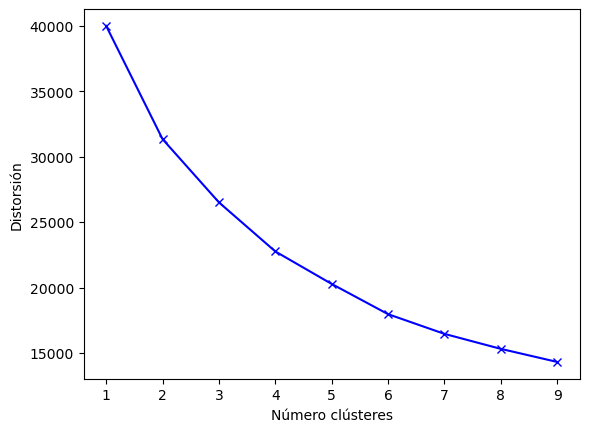

In [45]:
# Calculamos la distorsión existente para un rango de 1 a 10 clústeres.
# n_init es el número de veces que se lanza el algoritmo con diferentes datos iniciales para los centroides

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distorsion = []

for i in range(1, 10):
    kmeans = KMeans (n_clusters = i, n_init=10, random_state = 42).fit(rescaledX)
    distorsion.append(kmeans.inertia_)


plt.xlabel("Número clústeres")
plt.ylabel("Distorsión")
plt.plot(range(1,10), distorsion, "bx-")
plt.show()

**Nos indica un posible número optimo de 3 clústeres**

Centroides:
 [[-0.02377697 -0.30046274 -1.18920997 -0.02038415]
 [-0.03780652  1.66156955  0.23339071 -0.03384429]
 [ 0.03024396 -0.3919871   0.74392459  0.02644673]]


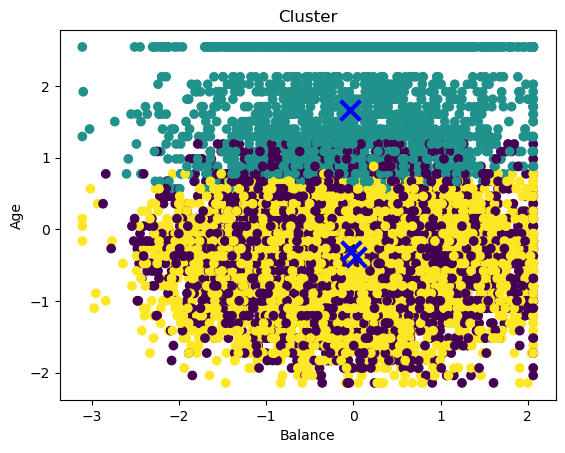

In [46]:
from sklearn.cluster import KMeans

# Finalmente inicializamos el algoritmo K-means con k = 3 clústeres porque encontramos que asi se genera la clasificación
kmeans = KMeans(n_clusters=3)                # más clara                               
kmeans.fit(rescaledX)

# Predecimos la asignación del clúster para cada punto de datos
labels = kmeans.predict(rescaledX)

# Obtenemos los centroides de los clústeres
centroides = kmeans.cluster_centers_

print("Centroides:\n", centroides)


plt.scatter(rescaledX[:, 0], rescaledX[:, 1], c=labels)
plt.scatter(centroides[:, 0], centroides[:, 1], marker="x", s=200, linewidths=3, color="b")
plt.xlabel('Balance')
plt.ylabel('Age')
plt.title('Cluster')


plt.show()

## INTERPRETACIÓN DE LOS RESULTADOS

In [47]:
# Asignación de grupo de cluster a cada registro del dataframe original

# Nuevo dataframe. Agregamos la columna "Cluster" 
df_clusters = df.copy()
df_clusters['Cluster'] = labels


# vemos a que cluster pertenece cada registro
df_clusters.head()

,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure,Cluster
0,619,0,0.00,1,1,1,42.0,1,101348.88,1,2.0,0
1,608,0,83807.86,1,0,1,41.0,2,112542.58,0,1.0,2
2,502,0,159660.80,3,1,0,42.0,1,113931.57,1,8.0,2
3,699,0,0.00,2,0,0,39.0,1,93826.63,0,1.0,0
4,850,0,125510.82,1,1,1,43.0,2,79084.10,0,2.0,2


In [48]:
# comprobamos que se han asignado 3 tipos distintos de cluster a cada registro

df_clusters['Cluster'].unique()

array([0, 2, 1], dtype=int32)

# AGRUPACIÓN DE REGISTROS (CLIENTES) PARA SU ESTUDIO

## CLUSTER 0

In [49]:
df_cluster_0 = df_clusters[df_clusters['Cluster'] == 0]

df_cluster_0

,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure,Cluster
0,619,0,0.00,1,1,1,42.0,1,101348.88,1,2.0,0
3,699,0,0.00,2,0,0,39.0,1,93826.63,0,1.0,0
6,822,1,0.00,2,1,1,50.0,1,10062.80,0,7.0,0
11,497,1,0.00,2,1,0,24.0,2,76390.01,0,3.0,0
12,476,0,0.00,2,1,0,34.0,1,26260.98,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9992,726,1,0.00,1,1,0,36.0,2,195192.40,0,2.0,0
9994,800,0,0.00,2,0,0,29.0,1,167773.55,0,2.0,0
9995,771,1,0.00,2,1,0,39.0,1,96270.64,0,5.0,0
9996,516,1,57369.61,1,1,1,35.0,1,101699.77,0,10.0,0


In [50]:
df_cluster_0.describe()

,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure,Cluster
count,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.0
mean,648.230133,0.544461,2299.232422,1.777843,0.717282,0.493944,35.697194,1.358936,99181.147092,0.085377,5.078287,0.0
std,96.262876,0.498093,10813.443957,0.490735,0.450387,0.500037,6.538046,0.510786,55394.521780,0.279483,2.870545,0.0
min,373.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,1.000000,90.070000,0.000000,0.000000,0.0
25%,581.000000,0.000000,0.000000,1.000000,0.000000,0.000000,31.000000,1.000000,54628.110000,0.000000,3.000000,0.0
50%,649.000000,1.000000,0.000000,2.000000,1.000000,0.000000,36.000000,1.000000,100608.435000,0.000000,5.000000,0.0
75%,715.000000,1.000000,0.000000,2.000000,1.000000,1.000000,40.000000,2.000000,144078.020000,0.000000,8.000000,0.0
max,850.000000,1.000000,65521.200000,4.000000,1.000000,1.000000,50.000000,3.000000,199992.480000,1.000000,10.000000,0.0


In [51]:
# Cantidad registros variables categoricas

variables3 = ["Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Geography","Exited"]

for i in variables3:
    print(" ")
    print(df_cluster_0[i].value_counts())

 
1    1843
0    1542
Name: Gender, dtype: int64
 
2    2439
1     855
3      79
4      12
Name: NumOfProducts, dtype: int64
 
1    2428
0     957
Name: HasCrCard, dtype: int64
 
0    1713
1    1672
Name: IsActiveMember, dtype: int64
 
1    2222
2    1111
3      52
Name: Geography, dtype: int64
 
0    3096
1     289
Name: Exited, dtype: int64


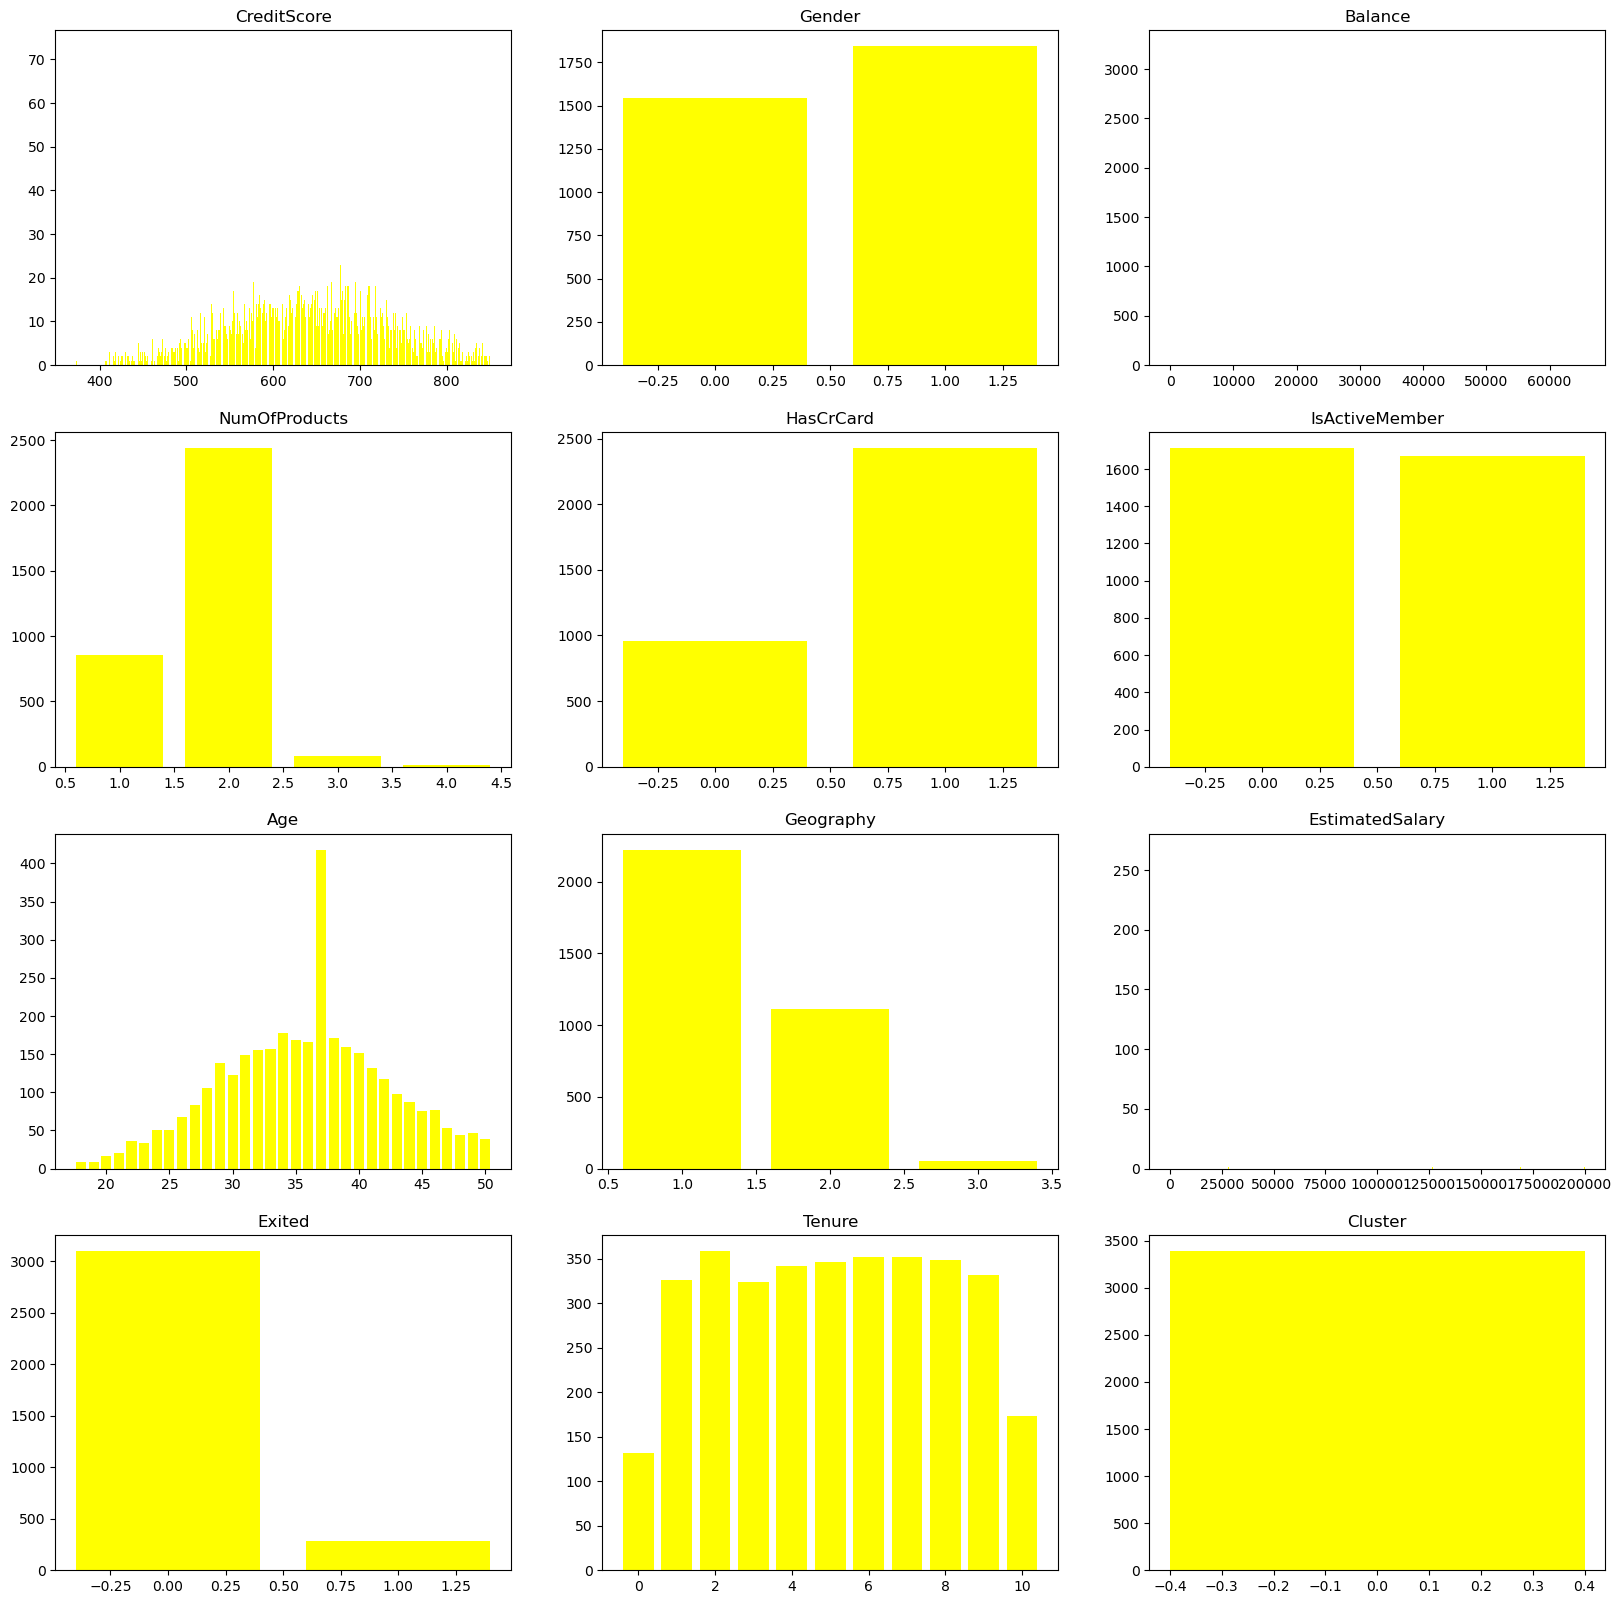

In [52]:
# Estudio variables con graficos de barras/histogramas:

fig = plt.figure(figsize=(20,20))

for i,column in enumerate(df_cluster_0.columns):
    ax = fig.add_subplot(4,3,i+1)
    ax.bar(df_cluster_0[column].value_counts().index, df_cluster_0[column].value_counts(),color='yellow')
    ax.set_title(column)
    
plt.show()

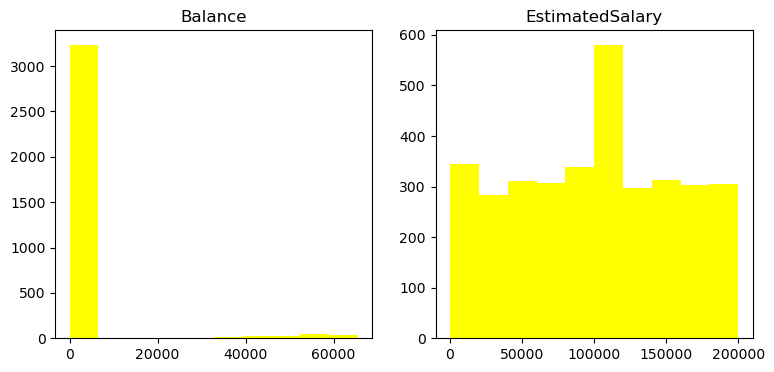

In [53]:
fig = plt.figure(figsize=(9,4))

for i, var in enumerate(['Balance', 'EstimatedSalary']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(df_cluster_0[var], bins=10,color='yellow')
    ax.set_title(var)

plt.show()

## CLUSTER 1

In [54]:
df_cluster_1 = df_clusters[df_clusters['Cluster'] == 1]

df_cluster_1

,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure,Cluster
35,475,0,134264.04,1,1,0,45.0,1,27822.990,1,0.0,1
41,465,0,122522.32,1,0,0,51.0,1,181297.650,1,8.0,1
42,556,0,117419.35,1,1,1,63.0,1,94153.830,0,2.0,1
43,834,0,131394.56,1,0,0,49.0,1,100608.435,1,2.0,1
44,660,0,155931.11,1,1,1,63.0,2,158338.390,0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9956,520,0,85216.61,1,1,0,46.0,1,117369.520,1,10.0,1
9967,623,1,118469.38,1,1,1,48.0,1,158590.250,0,5.0,1
9979,677,0,90022.85,1,0,1,58.0,1,2988.280,0,1.0,1
9982,655,0,137145.12,1,1,0,46.0,3,115146.400,1,7.0,1


In [55]:
df_cluster_1.describe()

,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure,Cluster
count,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.0
mean,646.839316,0.517949,91040.880638,1.450712,0.691738,0.597721,54.533903,1.907692,98523.056949,0.396011,5.022222,1.0
std,98.124437,0.499820,54721.727891,0.648868,0.461907,0.490497,6.361440,0.875697,54503.484602,0.489206,2.911282,0.0
min,350.000000,0.000000,0.000000,1.000000,0.000000,0.000000,43.000000,1.000000,11.580000,0.000000,0.000000,1.0
25%,581.500000,0.000000,64274.720000,1.000000,0.000000,0.000000,49.000000,1.000000,53266.285000,0.000000,3.000000,1.0
50%,646.000000,1.000000,106938.110000,1.000000,1.000000,1.000000,54.000000,2.000000,100608.435000,0.000000,5.000000,1.0
75%,715.000000,1.000000,128941.985000,2.000000,1.000000,1.000000,63.000000,3.000000,141489.005000,1.000000,8.000000,1.0
max,850.000000,1.000000,238387.560000,4.000000,1.000000,1.000000,63.000000,3.000000,199661.500000,1.000000,10.000000,1.0


In [56]:
for i in variables3:
    print(" ")
    print(df_cluster_1[i].value_counts())

 
1    909
0    846
Name: Gender, dtype: int64
 
1    1095
2     550
3      89
4      21
Name: NumOfProducts, dtype: int64
 
1    1214
0     541
Name: HasCrCard, dtype: int64
 
1    1049
0     706
Name: IsActiveMember, dtype: int64
 
1    761
3    599
2    395
Name: Geography, dtype: int64
 
0    1060
1     695
Name: Exited, dtype: int64


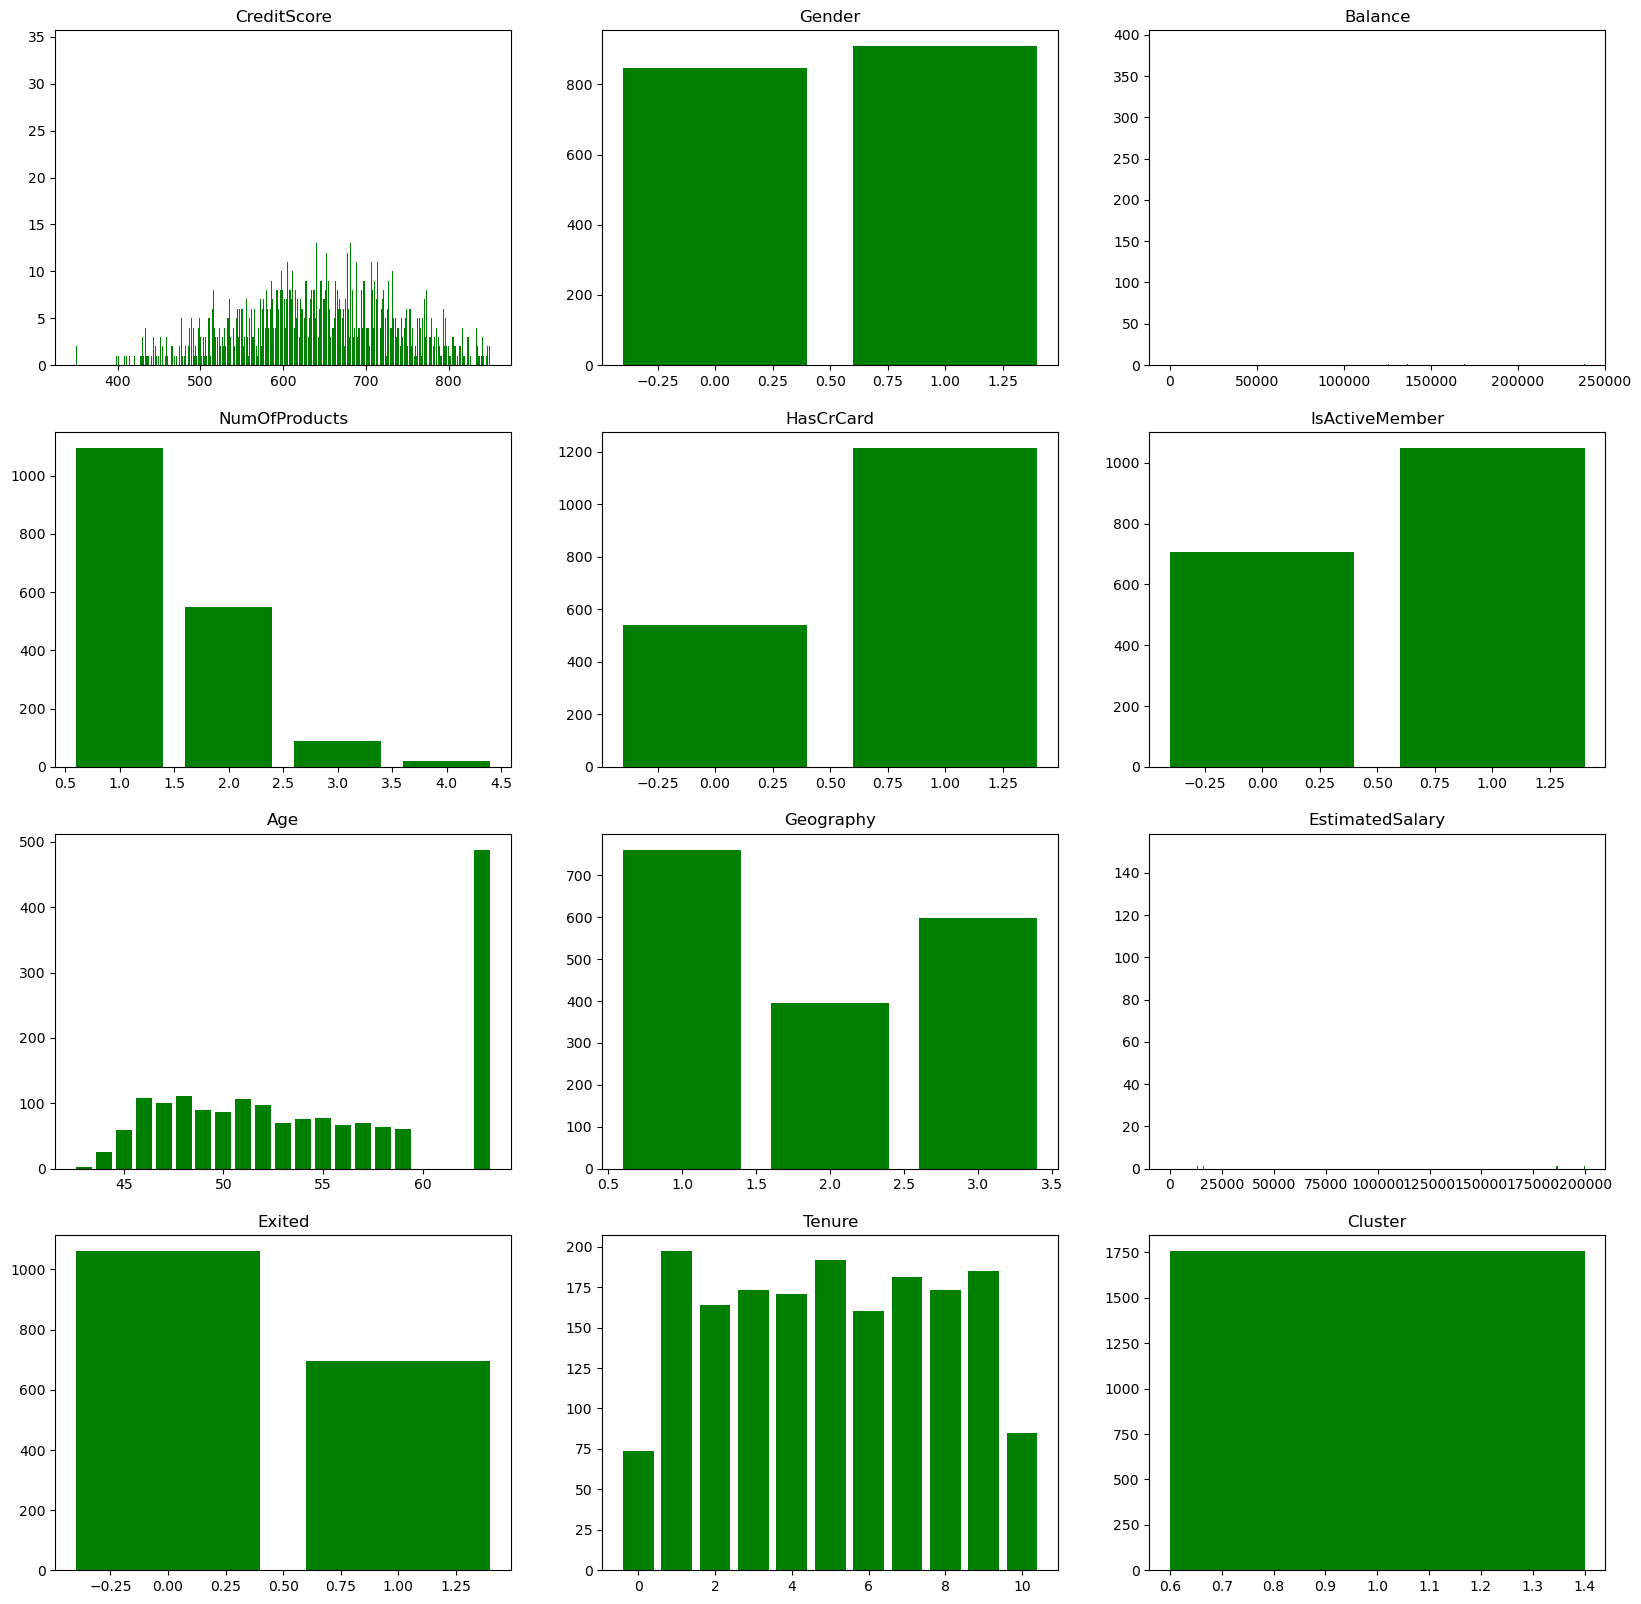

In [57]:
# Estudio variables con graficos de barras/histogramas:

fig = plt.figure(figsize=(20,20))

for i,column in enumerate(df_cluster_1.columns):
    ax = fig.add_subplot(4,3,i+1)
    ax.bar(df_cluster_1[column].value_counts().index, df_cluster_1[column].value_counts(), color='green')
    ax.set_title(column)
    
plt.show()

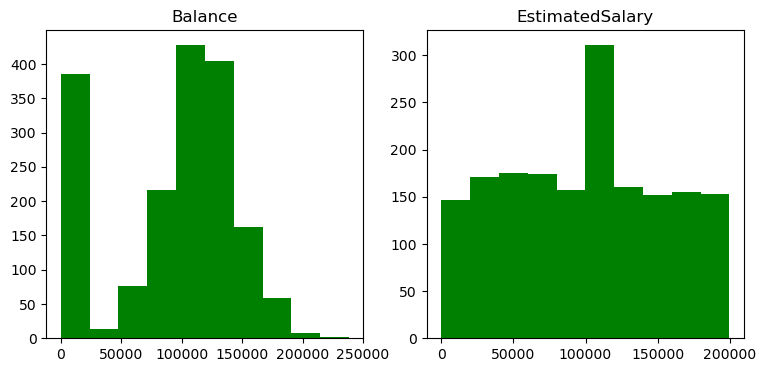

In [58]:
fig = plt.figure(figsize=(9,4))

for i, var in enumerate(['Balance', 'EstimatedSalary']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(df_cluster_1[var], bins=10, color='green')
    ax.set_title(var)

plt.show()

## CLUSTER 2 

In [59]:
df_cluster_2 = df_clusters[df_clusters['Cluster'] == 2]

df_cluster_2

,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure,Cluster
1,608,0,83807.86,1,0,1,41.0,2,112542.58,0,1.0,2
2,502,0,159660.80,3,1,0,42.0,1,113931.57,1,8.0,2
4,850,0,125510.82,1,1,1,43.0,2,79084.10,0,2.0,2
5,645,1,113755.78,2,1,0,44.0,2,149756.71,0,8.0,2
7,376,0,115046.74,4,1,0,29.0,3,119346.88,1,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9986,673,1,183579.54,2,0,1,47.0,3,34047.54,0,1.0,2
9987,606,1,180307.73,2,1,1,30.0,2,1914.41,0,8.0,2
9993,644,1,155060.41,1,1,0,28.0,1,29179.52,0,7.0,2
9998,772,1,75075.31,2,1,0,42.0,3,92888.52,1,3.0,2


In [60]:
df_cluster_2.describe()

,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,Age,Geography,EstimatedSalary,Exited,Tenure,Cluster
count,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.0
mean,653.462140,0.556584,122901.079344,1.386420,0.702263,0.500000,34.820576,1.964403,101761.350516,0.147942,4.963786,2.0
std,96.319882,0.496839,28004.055438,0.557518,0.457310,0.500051,5.760671,0.893926,55382.595023,0.355079,2.899909,0.0
min,350.000000,0.000000,60205.200000,1.000000,0.000000,0.000000,18.000000,1.000000,143.340000,0.000000,0.000000,2.0
25%,587.000000,0.000000,102831.955000,1.000000,0.000000,0.000000,31.000000,1.000000,56774.857500,0.000000,2.000000,2.0
50%,655.000000,1.000000,121940.335000,1.000000,1.000000,0.500000,36.000000,2.000000,100608.435000,0.000000,5.000000,2.0
75%,720.000000,1.000000,141351.190000,2.000000,1.000000,1.000000,39.000000,3.000000,147524.285000,0.000000,7.000000,2.0
max,850.000000,1.000000,250898.090000,4.000000,1.000000,1.000000,48.000000,3.000000,199970.740000,1.000000,10.000000,2.0


In [61]:
for i in variables3:
    print(" ")
    print(df_cluster_2[i].value_counts())

 
1    2705
0    2155
Name: Gender, dtype: int64
 
1    3134
2    1601
3      98
4      27
Name: NumOfProducts, dtype: int64
 
1    3413
0    1447
Name: HasCrCard, dtype: int64
 
1    2430
0    2430
Name: IsActiveMember, dtype: int64
 
1    2031
3    1858
2     971
Name: Geography, dtype: int64
 
0    4141
1     719
Name: Exited, dtype: int64


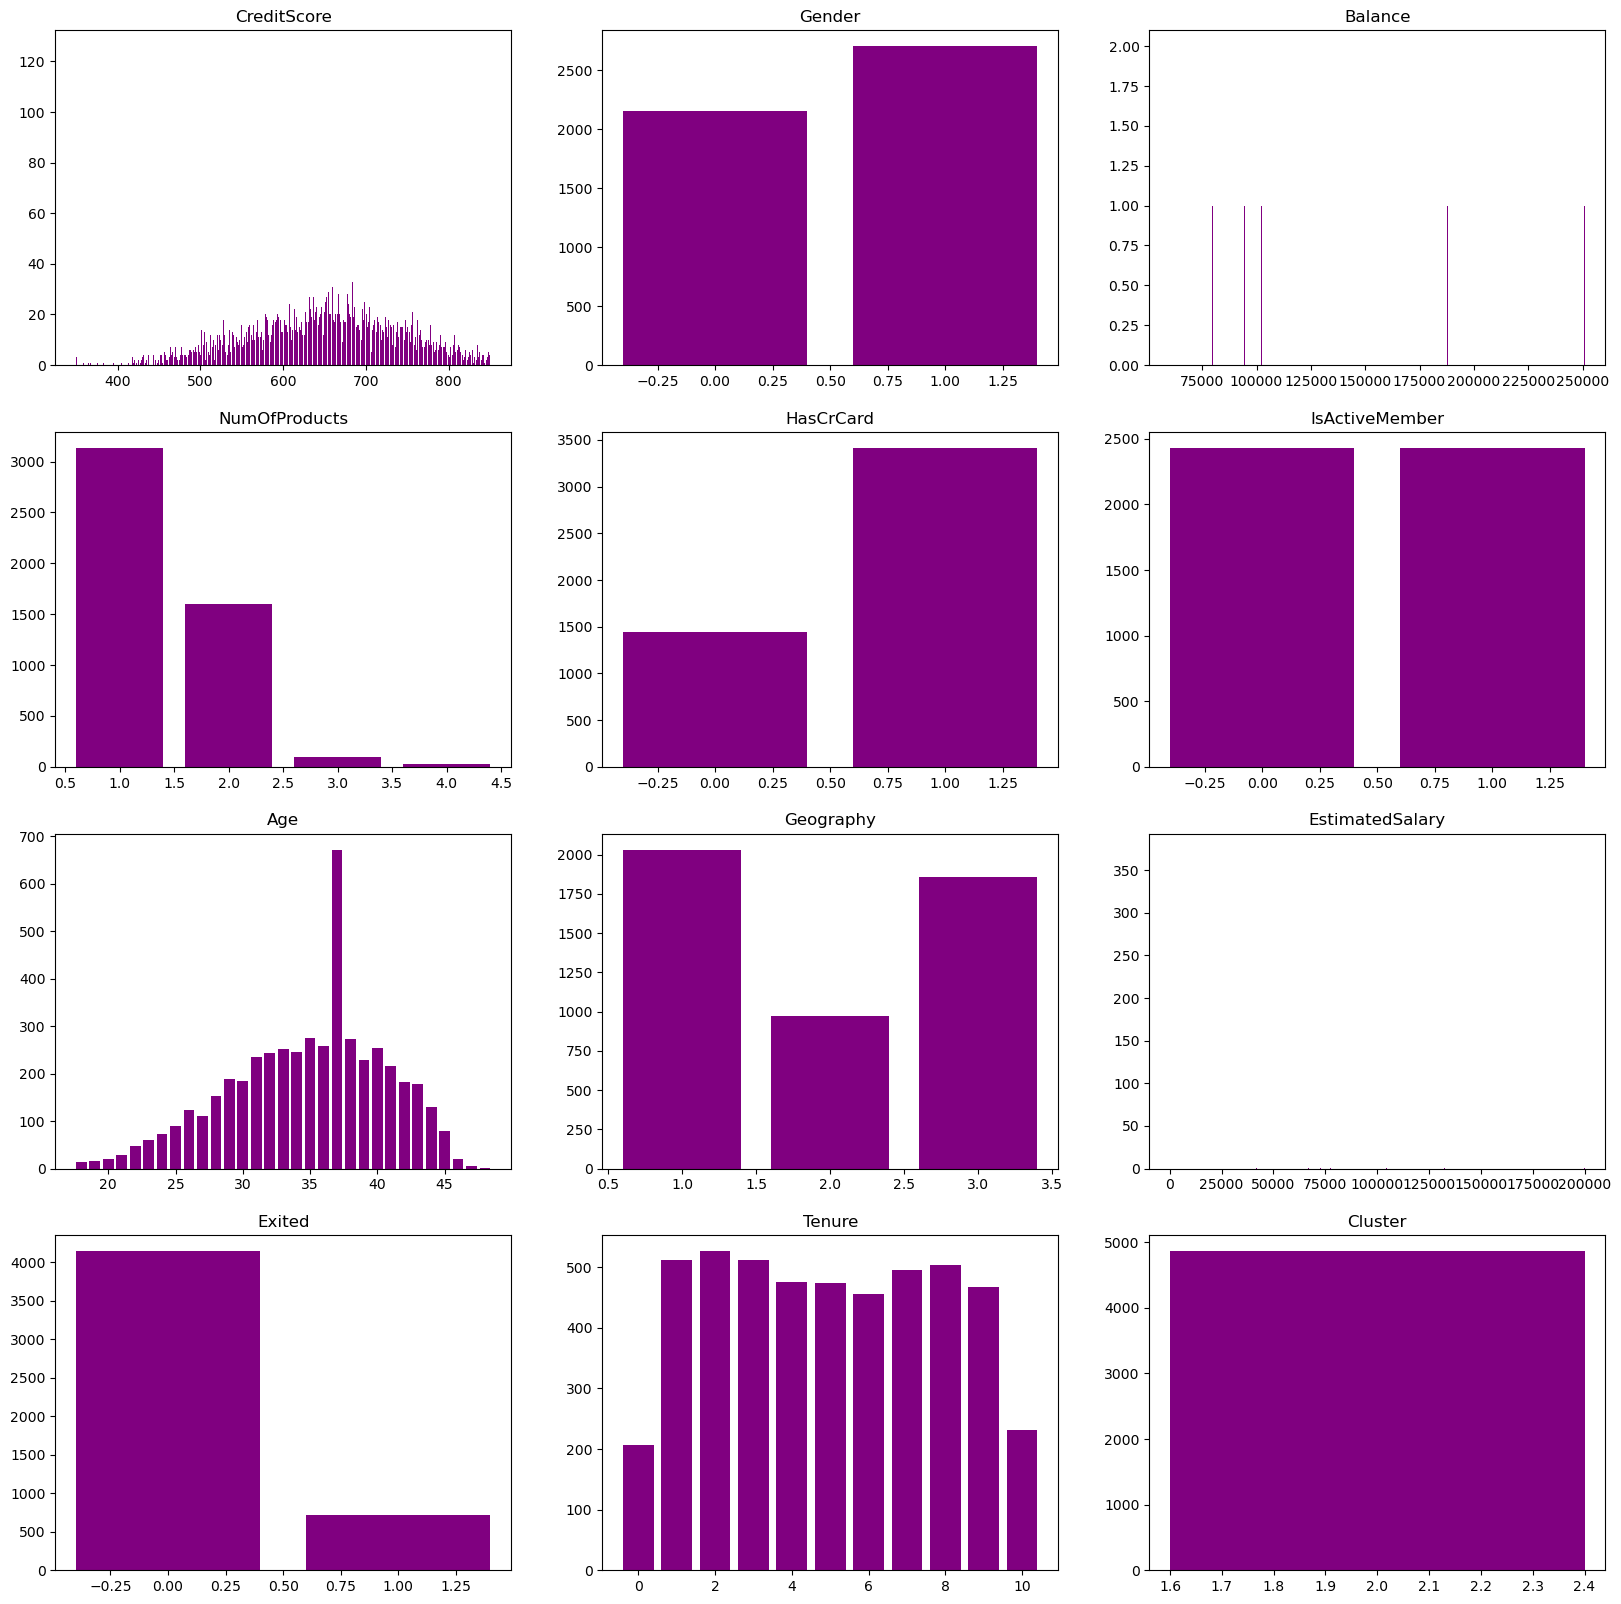

In [62]:
# Estudio variables con graficos de barras/histogramas:

fig = plt.figure(figsize=(20,20))

for i,column in enumerate(df_cluster_2.columns):
    ax = fig.add_subplot(4,3,i+1)
    ax.bar(df_cluster_2[column].value_counts().index, df_cluster_2[column].value_counts(), color='purple')
    ax.set_title(column)
    
plt.show()

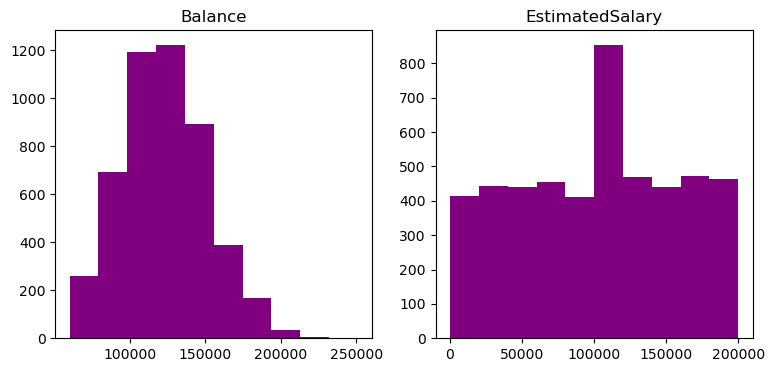

In [63]:
fig = plt.figure(figsize=(9,4))

for i, var in enumerate(['Balance', 'EstimatedSalary']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(df_cluster_2[var], bins=10, color='purple')
    ax.set_title(var)

plt.show()

# Representación gráfica de distribución de la muestra de clientes por cluster 

<AxesSubplot:xlabel='Age', ylabel='Balance'>

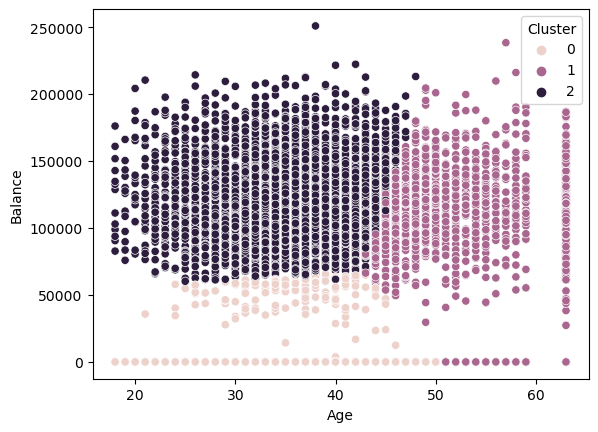

In [64]:
import seaborn as sns

sns.scatterplot(x='Age', y='Balance', hue='Cluster', data=df_clusters)

# Prueba con DBSCAN

<function matplotlib.pyplot.show(close=None, block=None)>

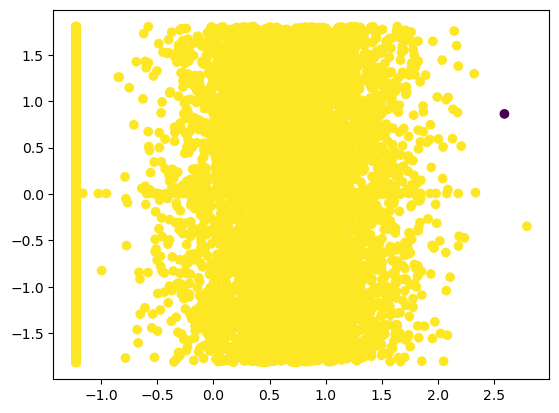

In [43]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


pred_labels = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

X = df_limpio[pred_labels]

# Estandarizar valores
scaler = StandardScaler()
rescaledX = scaler.fit_transform(X)

#Transformarlos a matriz
X = np.asarray(rescaledX)

#Creamos una instancia de DBSCAN
dbscan = DBSCAN (eps= 1, min_samples=4)

#Ajustamos y entramos el modelo en los datos
y_pred = dbscan.fit_predict(X)

#Pintamos los resultados
plt.scatter(X[:,2], X[:,3], c = y_pred) 
plt.show